## Import packages and data

In [1]:
import glob, re # imports glob and regex libraries
import pandas as pd
import seaborn as sns
file_list = glob.glob('./ExampleData/experiment *.xlsx') # gets file list
expt_info  = pd.read_excel('./ExampleData/experiment info.xlsx')

## Merge files

In [2]:
dfs = []
for each_file in file_list:
    file_num = re.search('([0-9])',each_file) # extract  experiment number
    if file_num:                
        df = pd.read_excel(each_file)  # reads each file as a Data Frame
        df['Expt'] = int(file_num[0]) 
        dfs.append(df) 

df_cat = pd.concat(dfs)  # concatenate results table
df_all = df_cat.merge(expt_info,on='Expt')  # merge with conditions table

## Plot merged data

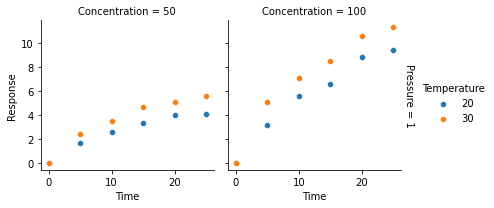

In [3]:
g = sns.FacetGrid(df_all, row="Pressure", col="Concentration",
                  hue='Temperature', margin_titles=True)
g.map(sns.scatterplot,'Time','Response')
g.add_legend();
